Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8580 - loss: 0.4849 - val_accuracy: 0.9580 - val_loss: 0.1446
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9550 - loss: 0.1515 - val_accuracy: 0.9697 - val_loss: 0.1042
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9655 - loss: 0.1112 - val_accuracy: 0.9715 - val_loss: 0.0919
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9729 - loss: 0.0871 - val_accuracy: 0.9760 - val_loss: 0.0796
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9775 - loss: 0.0732 - val_accuracy: 0.9770 - val_loss: 0.0770
313/313 - 0s - 670us/step - accuracy: 0.9770 - loss: 0.0770
Test accuracy: 97.70%


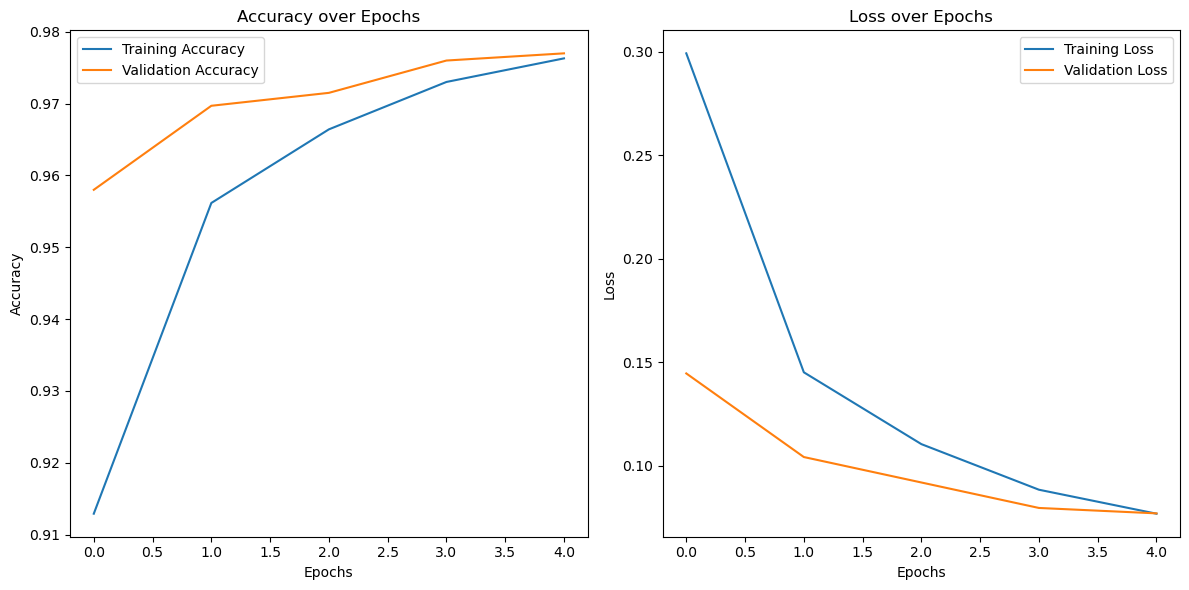

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step


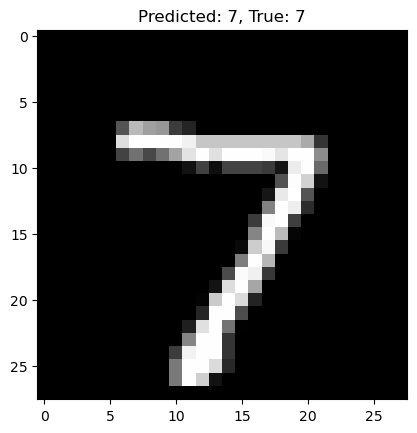

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


x_train, x_test = x_train / 255.0, x_test / 255.0


x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(28*28,)),  # First hidden layer
    tf.keras.layers.Dropout(0.2),  # Dropout to prevent overfitting
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer (10 classes for digits 0-9)
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # For integer labels
              metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Visualize the training and validation accuracy and loss curves
def plot_history(history):
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


plot_history(history)


y_pred = model.predict(x_test)

def display_sample_prediction(index):
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(y_pred[index])}, True: {y_test[index]}")
    plt.show()

display_sample_prediction(0)

model.save('mnist_model.h5')
